In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt

import seaborn as sns
import plotly.express as px
import ipywidgets as widgets
from IPython.display import display


from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

from sklearn.cluster import DBSCAN

In [3]:
plt.rcParams['figure.figsize'] = [6,4]
plt.rcParams['figure.dpi'] = 200
plt.rcParams["axes.grid"] = False

In [4]:
%store -r Bankaladesh_2019

In [5]:
Bankaladesh_2019

,Unnamed: 0_x,Player,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,...,Runs_y,Wkts,BBI,Ave_y,Econ,SR_y,4,5,Ct,St
5,5,Abu Jayed (BAN),2,-,-,-,-,-,-,-,...,114,5,5/58,22.80,6.33,21.6,0,1,0,0
19,19,Anamul Haque (BAN),1,1,0,14,14,14.00,24,58.33,...,-,-,-,-,-,-,-,-,0,0
183,183,Liton Das (BAN),9,9,1,263,94*,32.87,250,105.20,...,-,-,-,-,-,-,-,-,8,0
188,188,Mahmudullah (BAN),17,15,4,357,69,32.45,438,81.50,...,106,1,1/27,106.00,7.57,84.0,0,0,5,0
199,199,Mashrafe Mortaza (BAN),15,8,2,58,15,9.66,70,82.85,...,666,8,3/49,83.25,5.81,85.8,0,0,3,0
205,205,Mehidy Hasan Miraz (BAN),16,11,2,169,43,18.77,174,97.12,...,735,13,2/47,56.53,5.13,66.0,0,0,4,0
217,217,Mohammad Mithun (BAN),11,10,0,252,62,25.20,337,74.77,...,-,-,-,-,-,-,-,-,1,0
223,223,Mohammad Saifuddin (BAN),13,8,2,182,51*,30.33,208,87.50,...,671,18,3/72,37.27,6.39,35.0,0,0,1,0
230,230,Mosaddek Hossain (BAN),11,10,1,208,52*,23.11,197,105.58,...,333,3,2/33,111.00,5.55,120.0,0,0,4,0
238,238,Mushfiqur Rahim (BAN),18,18,3,754,102*,50.26,837,90.08,...,-,-,-,-,-,-,-,-,17,2


In [6]:
Bankaladesh_2019=Bankaladesh_2019.reset_index()

In [7]:
Bankaladesh_2019

,index,Unnamed: 0_x,Player,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,...,Runs_y,Wkts,BBI,Ave_y,Econ,SR_y,4,5,Ct,St
0,5,5,Abu Jayed (BAN),2,-,-,-,-,-,-,...,114,5,5/58,22.80,6.33,21.6,0,1,0,0
1,19,19,Anamul Haque (BAN),1,1,0,14,14,14.00,24,...,-,-,-,-,-,-,-,-,0,0
2,183,183,Liton Das (BAN),9,9,1,263,94*,32.87,250,...,-,-,-,-,-,-,-,-,8,0
3,188,188,Mahmudullah (BAN),17,15,4,357,69,32.45,438,...,106,1,1/27,106.00,7.57,84.0,0,0,5,0
4,199,199,Mashrafe Mortaza (BAN),15,8,2,58,15,9.66,70,...,666,8,3/49,83.25,5.81,85.8,0,0,3,0
5,205,205,Mehidy Hasan Miraz (BAN),16,11,2,169,43,18.77,174,...,735,13,2/47,56.53,5.13,66.0,0,0,4,0
6,217,217,Mohammad Mithun (BAN),11,10,0,252,62,25.20,337,...,-,-,-,-,-,-,-,-,1,0
7,223,223,Mohammad Saifuddin (BAN),13,8,2,182,51*,30.33,208,...,671,18,3/72,37.27,6.39,35.0,0,0,1,0
8,230,230,Mosaddek Hossain (BAN),11,10,1,208,52*,23.11,197,...,333,3,2/33,111.00,5.55,120.0,0,0,4,0
9,238,238,Mushfiqur Rahim (BAN),18,18,3,754,102*,50.26,837,...,-,-,-,-,-,-,-,-,17,2


In [8]:
Bankaladesh_2019.drop(['index','Unnamed: 0_x'],inplace=True,axis=1)

In [9]:
Bankaladesh_2019

,Player,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,...,Runs_y,Wkts,BBI,Ave_y,Econ,SR_y,4,5,Ct,St
0,Abu Jayed (BAN),2,-,-,-,-,-,-,-,-,...,114,5,5/58,22.80,6.33,21.6,0,1,0,0
1,Anamul Haque (BAN),1,1,0,14,14,14.00,24,58.33,0,...,-,-,-,-,-,-,-,-,0,0
2,Liton Das (BAN),9,9,1,263,94*,32.87,250,105.20,0,...,-,-,-,-,-,-,-,-,8,0
3,Mahmudullah (BAN),17,15,4,357,69,32.45,438,81.50,0,...,106,1,1/27,106.00,7.57,84.0,0,0,5,0
4,Mashrafe Mortaza (BAN),15,8,2,58,15,9.66,70,82.85,0,...,666,8,3/49,83.25,5.81,85.8,0,0,3,0
5,Mehidy Hasan Miraz (BAN),16,11,2,169,43,18.77,174,97.12,0,...,735,13,2/47,56.53,5.13,66.0,0,0,4,0
6,Mohammad Mithun (BAN),11,10,0,252,62,25.20,337,74.77,0,...,-,-,-,-,-,-,-,-,1,0
7,Mohammad Saifuddin (BAN),13,8,2,182,51*,30.33,208,87.50,0,...,671,18,3/72,37.27,6.39,35.0,0,0,1,0
8,Mosaddek Hossain (BAN),11,10,1,208,52*,23.11,197,105.58,0,...,333,3,2/33,111.00,5.55,120.0,0,0,4,0
9,Mushfiqur Rahim (BAN),18,18,3,754,102*,50.26,837,90.08,1,...,-,-,-,-,-,-,-,-,17,2


In [10]:
Bankaladesh_2019_players =Bankaladesh_2019.copy()

In [11]:
Bankaladesh_2019_players.drop('Player',axis=1,inplace=True)

In [12]:
Bankaladesh_2019_players.HS=Bankaladesh_2019_players.HS.str.extract('(\d+)')
Bankaladesh_2019_players['HS'].fillna(value=0, inplace=True)


In [13]:
Bankaladesh_2019_players

,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,50,...,Runs_y,Wkts,BBI,Ave_y,Econ,SR_y,4,5,Ct,St
0,2,-,-,-,0,-,-,-,-,-,...,114,5,5/58,22.80,6.33,21.6,0,1,0,0
1,1,1,0,14,14,14.00,24,58.33,0,0,...,-,-,-,-,-,-,-,-,0,0
2,9,9,1,263,94,32.87,250,105.20,0,2,...,-,-,-,-,-,-,-,-,8,0
3,17,15,4,357,69,32.45,438,81.50,0,1,...,106,1,1/27,106.00,7.57,84.0,0,0,5,0
4,15,8,2,58,15,9.66,70,82.85,0,0,...,666,8,3/49,83.25,5.81,85.8,0,0,3,0
5,16,11,2,169,43,18.77,174,97.12,0,0,...,735,13,2/47,56.53,5.13,66.0,0,0,4,0
6,11,10,0,252,62,25.20,337,74.77,0,2,...,-,-,-,-,-,-,-,-,1,0
7,13,8,2,182,51,30.33,208,87.50,0,1,...,671,18,3/72,37.27,6.39,35.0,0,0,1,0
8,11,10,1,208,52,23.11,197,105.58,0,1,...,333,3,2/33,111.00,5.55,120.0,0,0,4,0
9,18,18,3,754,102,50.26,837,90.08,1,5,...,-,-,-,-,-,-,-,-,17,2


In [14]:
Bankaladesh_2019_players.replace("-",0,inplace=True)

In [15]:
Bankaladesh_2019_players.drop('BBI',axis=1,inplace=True)

In [16]:
scaler = StandardScaler()

Bankaladesh_2019_players_scaled = pd.DataFrame(scaler.fit_transform(Bankaladesh_2019_players),columns=Bankaladesh_2019_players.columns)
Bankaladesh_2019_players_scaled.shape
Bankaladesh_2019_players_scaled.head()

,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,50,...,Mdns,Runs_y,Wkts,Ave_y,Econ,SR_y,4,5,Ct,St
0,-1.564068,-1.654625,-1.075888,-1.024391,-1.419646,-1.234616,-1.045110,-2.793658,-0.417029,-0.757937,...,-0.832405,-0.551620,-0.162912,-0.408808,0.704209,-0.454762,-0.242536,1.459601,-1.005141,-0.242536
1,-1.737853,-1.473020,-1.075888,-0.964648,-1.042669,-0.573454,-0.952668,-0.712714,-0.417029,-0.757937,...,-0.832405,-0.936497,-0.749396,-1.039517,-1.538318,-0.995965,-0.242536,-0.417029,-1.005141,-0.242536
2,-0.347571,-0.020178,-0.331042,0.097911,1.111482,0.317699,-0.082171,0.959390,-0.417029,0.252646,...,-0.832405,-0.936497,-0.749396,-1.039517,-1.538318,-0.995965,-0.242536,-0.417029,0.717958,-0.242536
3,1.042712,1.069453,1.903494,0.499038,0.438310,0.297864,0.641960,0.113884,-0.417029,-0.252646,...,-0.832405,-0.578629,-0.632100,1.892725,1.143504,1.108716,-0.242536,-0.417029,0.071796,-0.242536
4,0.695141,-0.201784,0.413803,-0.776887,-1.015742,-0.778414,-0.775487,0.162045,-0.417029,-0.757937,...,0.744784,1.311996,0.188978,1.263400,0.519989,1.153816,-0.242536,-0.417029,-0.358979,-0.242536


In [17]:
Bankaladesh_2019_players_scaled.describe()

,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,50,...,Mdns,Runs_y,Wkts,Ave_y,Econ,SR_y,4,5,Ct,St
count,18.000000,1.800000e+01,1.800000e+01,1.800000e+01,1.800000e+01,1.800000e+01,1.800000e+01,1.800000e+01,1.800000e+01,1.800000e+01,...,1.800000e+01,1.800000e+01,18.000000,1.800000e+01,1.800000e+01,1.800000e+01,1.800000e+01,1.800000e+01,1.800000e+01,1.800000e+01
mean,0.000000,3.700743e-17,3.700743e-17,3.700743e-17,1.850372e-17,-1.071674e-16,6.167906e-17,1.079383e-16,4.317534e-17,1.233581e-17,...,-2.467162e-17,-8.635068e-17,0.000000,-2.713879e-16,-1.110223e-16,3.700743e-17,-4.317534e-17,4.317534e-17,-1.110223e-16,-4.317534e-17
std,1.028992,1.028992e+00,1.028992e+00,1.028992e+00,1.028992e+00,1.028992e+00,1.028992e+00,1.028992e+00,1.028992e+00,1.028992e+00,...,1.028992e+00,1.028992e+00,1.028992,1.028992e+00,1.028992e+00,1.028992e+00,1.028992e+00,1.028992e+00,1.028992e+00,1.028992e+00
min,-1.737853,-1.654625e+00,-1.075888e+00,-1.024391e+00,-1.419646e+00,-1.234616e+00,-1.045110e+00,-2.793658e+00,-4.170288e-01,-7.579367e-01,...,-8.324051e-01,-9.364971e-01,-0.749396,-1.039517e+00,-1.538318e+00,-9.959653e-01,-2.425356e-01,-4.170288e-01,-1.005141e+00,-2.425356e-01
25%,-0.738588,-7.465992e-01,-1.075888e+00,-8.963715e-01,-9.955471e-01,-7.271738e-01,-8.987435e-01,-1.912298e-01,-4.170288e-01,-7.579367e-01,...,-8.324051e-01,-8.782591e-01,-0.749396,-1.039517e+00,-1.232760e+00,-9.959653e-01,-2.425356e-01,-4.170288e-01,-7.897540e-01,-2.425356e-01
50%,0.086893,7.062425e-02,-3.310424e-01,-1.922659e-01,-3.291065e-02,-5.987194e-02,-2.651293e-01,1.741750e-01,-4.170288e-01,-2.526456e-01,...,-8.324051e-01,-4.756572e-01,-0.280209,-2.821130e-01,4.739341e-01,-3.645609e-01,-2.425356e-01,-4.170288e-01,-1.435916e-01,-2.425356e-01
75%,0.868927,3.430321e-01,4.138029e-01,4.158253e-01,6.873838e-01,2.807448e-01,5.447027e-01,6.600733e-01,-4.170288e-01,2.526456e-01,...,7.447835e-01,6.815065e-01,0.188978,7.829686e-01,7.387506e-01,6.276460e-01,-2.425356e-01,-4.170288e-01,3.948770e-01,-2.425356e-01
max,1.216497,1.614269e+00,1.903494e+00,2.193159e+00,1.919289e+00,3.169198e+00,2.178811e+00,1.255852e+00,3.336231e+00,2.779101e+00,...,1.533378e+00,2.294446e+00,3.238696,2.031039e+00,1.143504e+00,2.010722e+00,4.123106e+00,3.336231e+00,2.656445e+00,4.123106e+00


In [18]:
X =  Bankaladesh_2019_players_scaled.iloc[:,:].values

In [19]:
X

array([[-1.56406801, -1.65462534, -1.07588766, -1.02439068, -1.41964575,
        -1.23461601, -1.04511024, -2.79365757, -0.41702883, -0.75793673,
        -0.62017367, -1.03476041, -0.94334397, -2.37229688, -1.56406801,
        -0.72582025, -0.57845901, -0.83240511, -0.55161986, -0.16291226,
        -0.40880803,  0.70420934, -0.45476151, -0.24253563,  1.4596009 ,
        -1.00514142, -0.24253563],
       [-1.73785334, -1.47302012, -1.07588766, -0.96464839, -1.04266922,
        -0.57345352, -0.95266806, -0.71271426, -0.41702883, -0.75793673,
        -0.62017367, -0.94627733, -0.94334397, -2.22803558, -1.73785334,
        -1.06962984, -0.93964753, -0.83240511, -0.93649709, -0.74939641,
        -1.03951671, -1.53831756, -0.99596529, -0.24253563, -0.41702883,
        -1.00514142, -0.24253563],
       [-0.34757067, -0.02017836, -0.33104236,  0.09791098,  1.11148239,
         0.31769907, -0.08217083,  0.9593895 , -0.41702883,  0.25264558,
        -0.62017367,  0.07127803,  0.87596226, -0.5381

In [20]:
"""from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)"""

'from sklearn.cross_validation import train_test_split\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)'

In [21]:
"""from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
sc_y = StandardScaler()
y_train = sc_y.fit_transform(y_train)"""

'from sklearn.preprocessing import StandardScaler\nsc_X = StandardScaler()\nX_train = sc_X.fit_transform(X_train)\nX_test = sc_X.transform(X_test)\nsc_y = StandardScaler()\ny_train = sc_y.fit_transform(y_train)'

In [22]:
np.any(np.isnan(Bankaladesh_2019_players_scaled))

False

In [23]:
Bankaladesh_2019_players_scaled

,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,50,...,Mdns,Runs_y,Wkts,Ave_y,Econ,SR_y,4,5,Ct,St
0,-1.564068,-1.654625,-1.075888,-1.024391,-1.419646,-1.234616,-1.045110,-2.793658,-0.417029,-0.757937,...,-0.832405,-0.551620,-0.162912,-0.408808,0.704209,-0.454762,-0.242536,1.459601,-1.005141,-0.242536
1,-1.737853,-1.473020,-1.075888,-0.964648,-1.042669,-0.573454,-0.952668,-0.712714,-0.417029,-0.757937,...,-0.832405,-0.936497,-0.749396,-1.039517,-1.538318,-0.995965,-0.242536,-0.417029,-1.005141,-0.242536
2,-0.347571,-0.020178,-0.331042,0.097911,1.111482,0.317699,-0.082171,0.959390,-0.417029,0.252646,...,-0.832405,-0.936497,-0.749396,-1.039517,-1.538318,-0.995965,-0.242536,-0.417029,0.717958,-0.242536
3,1.042712,1.069453,1.903494,0.499038,0.438310,0.297864,0.641960,0.113884,-0.417029,-0.252646,...,-0.832405,-0.578629,-0.632100,1.892725,1.143504,1.108716,-0.242536,-0.417029,0.071796,-0.242536
4,0.695141,-0.201784,0.413803,-0.776887,-1.015742,-0.778414,-0.775487,0.162045,-0.417029,-0.757937,...,0.744784,1.311996,0.188978,1.263400,0.519989,1.153816,-0.242536,-0.417029,-0.358979,-0.242536
5,0.868927,0.343032,0.413803,-0.303216,-0.261789,-0.348186,-0.374904,0.671133,-0.417029,-0.757937,...,-0.043811,1.544948,0.775462,0.524254,0.279086,0.657713,-0.242536,-0.417029,-0.143592,-0.242536
6,0.000000,0.161427,-1.075888,0.050971,0.249822,-0.044524,0.252932,-0.126211,-0.417029,0.252646,...,-0.832405,-0.936497,-0.749396,-1.039517,-1.538318,-0.995965,-0.242536,-0.417029,-0.789754,-0.242536
7,0.347571,-0.201784,0.413803,-0.247741,-0.046374,0.197745,-0.243945,0.327936,-0.417029,-0.252646,...,1.533378,1.328877,1.361947,-0.008529,0.725466,-0.119015,-0.242536,-0.417029,-0.789754,-0.242536
8,0.000000,0.161427,-0.331042,-0.136791,-0.019447,-0.143226,-0.286314,0.972946,-0.417029,-0.252646,...,-0.832405,0.187750,-0.397506,2.031039,0.427879,2.010722,-0.242536,-0.417029,-0.143592,-0.242536
9,1.216497,1.614269,1.158648,2.193159,1.326898,1.138957,2.178811,0.419978,1.459601,1.768519,...,-0.832405,-0.936497,-0.749396,-1.039517,-1.538318,-0.995965,-0.242536,-0.417029,2.656445,4.123106


In [25]:
np.all(np.isfinite(Bankaladesh_2019_players_scaled))

True

K:\4th year\my research practical\jupyter\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


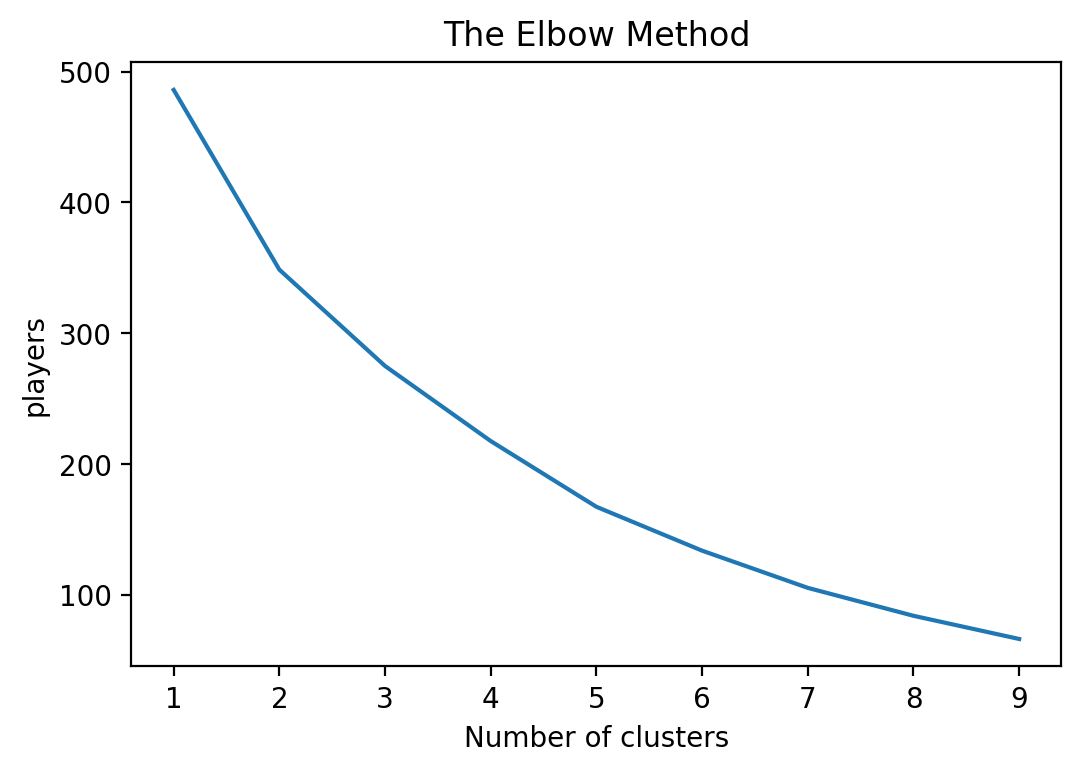

In [26]:
from sklearn.cluster import KMeans
players = []
for i in range(1,10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    players.append(kmeans.inertia_)
plt.plot(range(1, 10), players)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('players')
plt.show()

In [27]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)


In [28]:
y_kmeans

array([2, 2, 1, 0, 0, 0, 1, 0, 0, 1, 0, 2, 1, 2, 1, 1, 2, 1])

In [29]:
kmeans.cluster_centers_

array([[ 0.63721289,  0.1916944 ,  0.78622559, -0.3131729 , -0.30666742,
        -0.29387623, -0.3209798 ,  0.28607669, -0.41702883, -0.50529115,
         0.12403473, -0.4006317 ,  0.06738171, -0.21868181,  0.63721289,
         1.1078309 ,  0.99170773,  0.35048636,  1.01489801,  0.7559129 ,
         0.90696646,  0.65933519,  0.73997924,  0.48507125,  0.20851441,
        -0.25128536, -0.24253563],
       [ 0.47170305,  0.78407333, -0.11822941,  0.95198194,  1.03070171,
         0.70090346,  0.9660575 ,  0.37329443,  0.65533102,  0.97449008,
         0.33666571,  1.0256312 ,  0.57274455,  0.45993511,  0.47170305,
        -0.5047998 , -0.50278142, -0.60709245, -0.53232776, -0.39750592,
        -0.77506167, -0.63847264, -0.73466981, -0.24253563, -0.14893887,
         0.8410367 ,  0.38112741],
       [-1.42503974, -1.32773594, -0.77794954, -0.95696724, -1.07498149,
        -0.62861336, -0.96730474, -0.86590423, -0.41702883, -0.75793673,
        -0.62017367, -0.95512564, -0.88270043, -0.3814

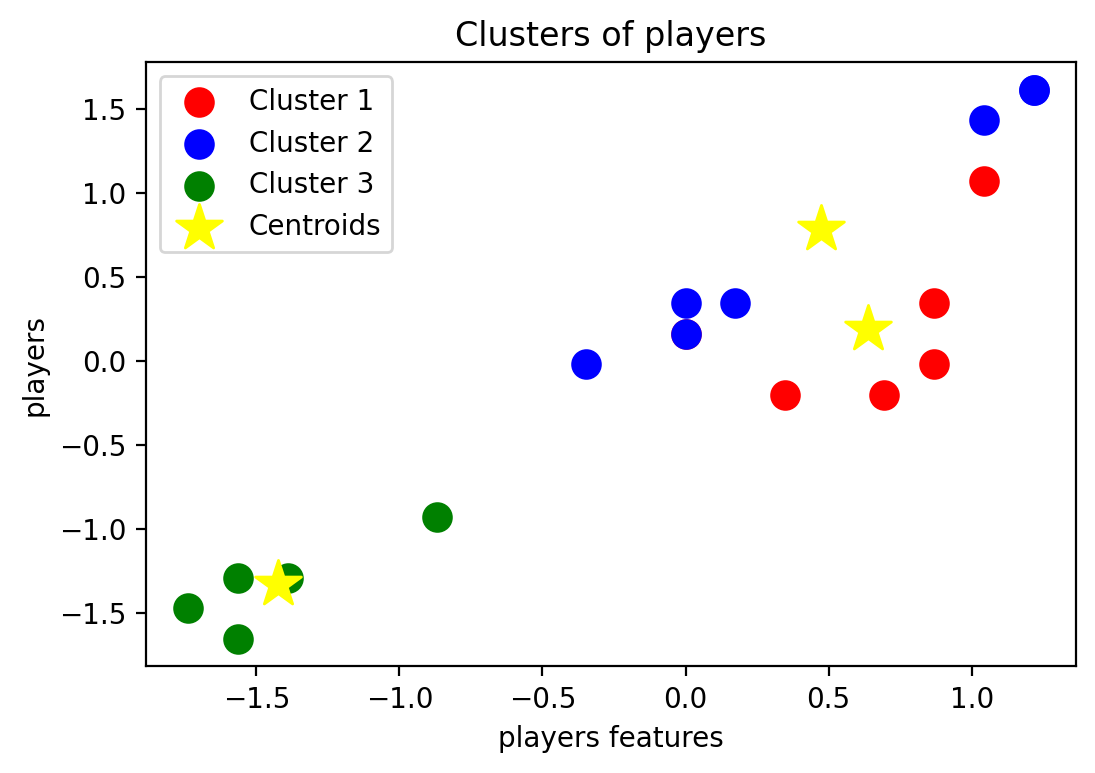

In [30]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300,marker='*', c = 'yellow', label = 'Centroids')
plt.title('Clusters of players')
plt.xlabel('players features')
plt.ylabel('players')
plt.legend()
plt.show()

In [31]:
Bankaladesh_2019

,Player,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,...,Runs_y,Wkts,BBI,Ave_y,Econ,SR_y,4,5,Ct,St
0,Abu Jayed (BAN),2,-,-,-,-,-,-,-,-,...,114,5,5/58,22.80,6.33,21.6,0,1,0,0
1,Anamul Haque (BAN),1,1,0,14,14,14.00,24,58.33,0,...,-,-,-,-,-,-,-,-,0,0
2,Liton Das (BAN),9,9,1,263,94*,32.87,250,105.20,0,...,-,-,-,-,-,-,-,-,8,0
3,Mahmudullah (BAN),17,15,4,357,69,32.45,438,81.50,0,...,106,1,1/27,106.00,7.57,84.0,0,0,5,0
4,Mashrafe Mortaza (BAN),15,8,2,58,15,9.66,70,82.85,0,...,666,8,3/49,83.25,5.81,85.8,0,0,3,0
5,Mehidy Hasan Miraz (BAN),16,11,2,169,43,18.77,174,97.12,0,...,735,13,2/47,56.53,5.13,66.0,0,0,4,0
6,Mohammad Mithun (BAN),11,10,0,252,62,25.20,337,74.77,0,...,-,-,-,-,-,-,-,-,1,0
7,Mohammad Saifuddin (BAN),13,8,2,182,51*,30.33,208,87.50,0,...,671,18,3/72,37.27,6.39,35.0,0,0,1,0
8,Mosaddek Hossain (BAN),11,10,1,208,52*,23.11,197,105.58,0,...,333,3,2/33,111.00,5.55,120.0,0,0,4,0
9,Mushfiqur Rahim (BAN),18,18,3,754,102*,50.26,837,90.08,1,...,-,-,-,-,-,-,-,-,17,2


In [32]:
Bankaladesh_2019["cluster"] = y_kmeans

In [33]:
Bankaladesh_2019

,Player,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,...,Wkts,BBI,Ave_y,Econ,SR_y,4,5,Ct,St,cluster
0,Abu Jayed (BAN),2,-,-,-,-,-,-,-,-,...,5,5/58,22.80,6.33,21.6,0,1,0,0,2
1,Anamul Haque (BAN),1,1,0,14,14,14.00,24,58.33,0,...,-,-,-,-,-,-,-,0,0,2
2,Liton Das (BAN),9,9,1,263,94*,32.87,250,105.20,0,...,-,-,-,-,-,-,-,8,0,1
3,Mahmudullah (BAN),17,15,4,357,69,32.45,438,81.50,0,...,1,1/27,106.00,7.57,84.0,0,0,5,0,0
4,Mashrafe Mortaza (BAN),15,8,2,58,15,9.66,70,82.85,0,...,8,3/49,83.25,5.81,85.8,0,0,3,0,0
5,Mehidy Hasan Miraz (BAN),16,11,2,169,43,18.77,174,97.12,0,...,13,2/47,56.53,5.13,66.0,0,0,4,0,0
6,Mohammad Mithun (BAN),11,10,0,252,62,25.20,337,74.77,0,...,-,-,-,-,-,-,-,1,0,1
7,Mohammad Saifuddin (BAN),13,8,2,182,51*,30.33,208,87.50,0,...,18,3/72,37.27,6.39,35.0,0,0,1,0,0
8,Mosaddek Hossain (BAN),11,10,1,208,52*,23.11,197,105.58,0,...,3,2/33,111.00,5.55,120.0,0,0,4,0,0
9,Mushfiqur Rahim (BAN),18,18,3,754,102*,50.26,837,90.08,1,...,-,-,-,-,-,-,-,17,2,1


In [34]:
Bankaladesh_2019['cluster'].value_counts()

1    7
0    6
2    5
Name: cluster, dtype: int64

In [35]:
Bankaladesh_Cluster_2019 = np.array([6,7,5])

In [36]:
Bankaladesh_Cluster_2019

array([6, 7, 5])

In [37]:
%store Bankaladesh_Cluster_2019

Stored 'Bankaladesh_Cluster_2019' (ndarray)


In [38]:
Bankaladesh_2019_players_scaled.insert(0, 'Player', Bankaladesh_2019.Player)

In [39]:
Bankaladesh_2019_players_scaled

,Player,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,...,Mdns,Runs_y,Wkts,Ave_y,Econ,SR_y,4,5,Ct,St
0,Abu Jayed (BAN),-1.564068,-1.654625,-1.075888,-1.024391,-1.419646,-1.234616,-1.045110,-2.793658,-0.417029,...,-0.832405,-0.551620,-0.162912,-0.408808,0.704209,-0.454762,-0.242536,1.459601,-1.005141,-0.242536
1,Anamul Haque (BAN),-1.737853,-1.473020,-1.075888,-0.964648,-1.042669,-0.573454,-0.952668,-0.712714,-0.417029,...,-0.832405,-0.936497,-0.749396,-1.039517,-1.538318,-0.995965,-0.242536,-0.417029,-1.005141,-0.242536
2,Liton Das (BAN),-0.347571,-0.020178,-0.331042,0.097911,1.111482,0.317699,-0.082171,0.959390,-0.417029,...,-0.832405,-0.936497,-0.749396,-1.039517,-1.538318,-0.995965,-0.242536,-0.417029,0.717958,-0.242536
3,Mahmudullah (BAN),1.042712,1.069453,1.903494,0.499038,0.438310,0.297864,0.641960,0.113884,-0.417029,...,-0.832405,-0.578629,-0.632100,1.892725,1.143504,1.108716,-0.242536,-0.417029,0.071796,-0.242536
4,Mashrafe Mortaza (BAN),0.695141,-0.201784,0.413803,-0.776887,-1.015742,-0.778414,-0.775487,0.162045,-0.417029,...,0.744784,1.311996,0.188978,1.263400,0.519989,1.153816,-0.242536,-0.417029,-0.358979,-0.242536
5,Mehidy Hasan Miraz (BAN),0.868927,0.343032,0.413803,-0.303216,-0.261789,-0.348186,-0.374904,0.671133,-0.417029,...,-0.043811,1.544948,0.775462,0.524254,0.279086,0.657713,-0.242536,-0.417029,-0.143592,-0.242536
6,Mohammad Mithun (BAN),0.000000,0.161427,-1.075888,0.050971,0.249822,-0.044524,0.252932,-0.126211,-0.417029,...,-0.832405,-0.936497,-0.749396,-1.039517,-1.538318,-0.995965,-0.242536,-0.417029,-0.789754,-0.242536
7,Mohammad Saifuddin (BAN),0.347571,-0.201784,0.413803,-0.247741,-0.046374,0.197745,-0.243945,0.327936,-0.417029,...,1.533378,1.328877,1.361947,-0.008529,0.725466,-0.119015,-0.242536,-0.417029,-0.789754,-0.242536
8,Mosaddek Hossain (BAN),0.000000,0.161427,-0.331042,-0.136791,-0.019447,-0.143226,-0.286314,0.972946,-0.417029,...,-0.832405,0.187750,-0.397506,2.031039,0.427879,2.010722,-0.242536,-0.417029,-0.143592,-0.242536
9,Mushfiqur Rahim (BAN),1.216497,1.614269,1.158648,2.193159,1.326898,1.138957,2.178811,0.419978,1.459601,...,-0.832405,-0.936497,-0.749396,-1.039517,-1.538318,-0.995965,-0.242536,-0.417029,2.656445,4.123106


In [40]:
Bankaladesh_2019_players_scaled[['Player','Ave_x','Ave_y']]

,Player,Ave_x,Ave_y
0,Abu Jayed (BAN),-1.234616,-0.408808
1,Anamul Haque (BAN),-0.573454,-1.039517
2,Liton Das (BAN),0.317699,-1.039517
3,Mahmudullah (BAN),0.297864,1.892725
4,Mashrafe Mortaza (BAN),-0.778414,1.263400
5,Mehidy Hasan Miraz (BAN),-0.348186,0.524254
6,Mohammad Mithun (BAN),-0.044524,-1.039517
7,Mohammad Saifuddin (BAN),0.197745,-0.008529
8,Mosaddek Hossain (BAN),-0.143226,2.031039
9,Mushfiqur Rahim (BAN),1.138957,-1.039517


In [41]:
Bankaladesh_2019_Ave=Bankaladesh_2019_players_scaled.mean()

In [42]:
Bankaladesh_2019_Ave

Mat_x           0.000000e+00
Inns_x          3.700743e-17
NO              3.700743e-17
Runs_x          3.700743e-17
HS              1.850372e-17
Ave_x          -1.071674e-16
BF              6.167906e-17
SR_x            1.079383e-16
100             4.317534e-17
50              1.233581e-17
0               0.000000e+00
4s              0.000000e+00
6s             -2.467162e-17
Unnamed: 0_y   -1.110223e-16
Mat_y           0.000000e+00
Inns_y          1.233581e-17
Overs           1.850372e-17
Mdns           -2.467162e-17
Runs_y         -8.635068e-17
Wkts            0.000000e+00
Ave_y          -2.713879e-16
Econ           -1.110223e-16
SR_y            3.700743e-17
4              -4.317534e-17
5               4.317534e-17
Ct             -1.110223e-16
St             -4.317534e-17
dtype: float64

In [43]:
Bankaladesh_Ave_2019 =Bankaladesh_2019_Ave[['Ave_x','Ave_y']]

In [44]:
Bankaladesh_Ave_2019

Ave_x   -1.071674e-16
Ave_y   -2.713879e-16
dtype: float64

In [45]:
Bankaladesh_Ave_2019 = np.array([Bankaladesh_Ave_2019.Ave_x, Bankaladesh_Ave_2019.Ave_y])

In [46]:
Bankaladesh_Ave_2019

array([-1.07167361e-16, -2.71387850e-16])

In [47]:
%store Bankaladesh_Ave_2019

Stored 'Bankaladesh_Ave_2019' (ndarray)


In [48]:
Bankaladesh_2019

,Player,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,...,Wkts,BBI,Ave_y,Econ,SR_y,4,5,Ct,St,cluster
0,Abu Jayed (BAN),2,-,-,-,-,-,-,-,-,...,5,5/58,22.80,6.33,21.6,0,1,0,0,2
1,Anamul Haque (BAN),1,1,0,14,14,14.00,24,58.33,0,...,-,-,-,-,-,-,-,0,0,2
2,Liton Das (BAN),9,9,1,263,94*,32.87,250,105.20,0,...,-,-,-,-,-,-,-,8,0,1
3,Mahmudullah (BAN),17,15,4,357,69,32.45,438,81.50,0,...,1,1/27,106.00,7.57,84.0,0,0,5,0,0
4,Mashrafe Mortaza (BAN),15,8,2,58,15,9.66,70,82.85,0,...,8,3/49,83.25,5.81,85.8,0,0,3,0,0
5,Mehidy Hasan Miraz (BAN),16,11,2,169,43,18.77,174,97.12,0,...,13,2/47,56.53,5.13,66.0,0,0,4,0,0
6,Mohammad Mithun (BAN),11,10,0,252,62,25.20,337,74.77,0,...,-,-,-,-,-,-,-,1,0,1
7,Mohammad Saifuddin (BAN),13,8,2,182,51*,30.33,208,87.50,0,...,18,3/72,37.27,6.39,35.0,0,0,1,0,0
8,Mosaddek Hossain (BAN),11,10,1,208,52*,23.11,197,105.58,0,...,3,2/33,111.00,5.55,120.0,0,0,4,0,0
9,Mushfiqur Rahim (BAN),18,18,3,754,102*,50.26,837,90.08,1,...,-,-,-,-,-,-,-,17,2,1
